# Библиотека для работы с элементами FCA

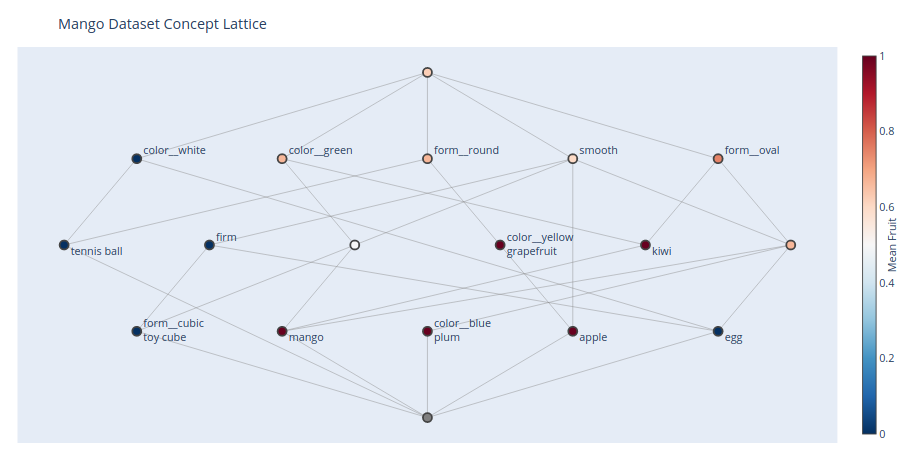

Решётка понятий отображается с помощью библиотеки Plotly, которая рисует интерактивные графики. Для получения графиков с данного ноутбука в интерактивном виде, надо запустить ноутбук https://github.com/EgorDudyrev/FCA_BB_interpret/blob/master/notebooks/2020.01.25-First_pres.ipynb 

На решётке можно отразить три различных измерения:
* положение по вертикали - порядок между концептами
* положение по горизонтали - среднее предсказание для объектов концепта (sort_by="y_pred"), среднее истинное значение $y$ внутри концепта (sort_by="y_true"), значения метрик качества (в случае бин. классификации -{"accuracy", "precision", "recall"})
* цвет - те же варианты, что и в пункте "положение по горизонтали"

В данный момент цвет - это доля положительного класса в концепте (фруктов), расположение по горизонтали показывает качество (accuracy) классификации концепта.

При наведении мыши на концепт появляется более подробная информация о нём. Также, с помощью панели управления в верхнем правом углу, изображение можно увеличивать, уменьшать, передвигать.

# Идеи интерпретаций

## Задание
Задача интерпретации - определить, какие признаки важны для предсказания модели. Т.е. изменение какого признака сильнее всего изменит предсказание. Также желательно показать какие именно значения признаков влияют на предсказания.
В курсовой необходимо предложить способ интерпретации моделей Чёрный ящик, которая бы использовала FCA. Как вариант - результат интерпретации должен отображаться в виде Решётки понятий.

Модель для интерпретации рассматривается как Чёрный ящик. Т.е. ещё внутренее устройство неизвестно и может быть любым. Что известно - это:
* входные данные $X$ (набор признаков и значений, на основе которого модель делает предсказания)
* модель Чёрного ящика в виде функции $BB: X \mapsto Y$, где $Y$ - предсказания модели.

## Плюсы FCA

"Понятие" (концепт) как набор атрибутов и соответствующих им объектов может соответствовать некому бизнес термину, понятному ЛПР. Также, исходные данные зачастую мультиколлинеарны. В частности, несколько разных признаков из исходных данных могут соответствовать одному и тому же объекту (свойству) реального мира. Такие признаки могут объединится в одно Понятие, т.е. интерпретация с FCA может показать коррелирующие признаки.

## Недостатки FCA

FCA может быть не самым точным предсказательным методом. Будем считать данный Чёрный ящик наилучшей возможной моделью для решения конкретной задачи, которая предсказывает результат сильно лучше всех остальных моделей, в т.ч. FCA. Т.е. FCA должен быть использован только для интерпретации модели, но не для предсказания результата.

## Подходы интерпретации

Есть 2 главных подхода к интерпретации модели:
1. Глобальная интерпретация - показывает, какие признаки важны для модели _в целом_ на всём наборе данных.
2. Локальная интерпретация - показывает, какие признаки и как сильно влияют на предсказание конкретного наблюдения (строчки данных). 

Похожая классификация приведена в онлайн книге по интерпретации чёрных ящиков: Christoph Molnar, A Guide for Making Black Box Models Explainable. 2019-12-17 (https://christophm.github.io/interpretable-ml-book/)

# Методы интерпретации

## Поочерёдное зашумление признаков

Самый базовый метод.


Значение каждого признака из исходных данных поочерёдно заменяется на случайный шум. Чем сильнее изменились предсказания при зашумлении конкретного признака - тем этот признак "важнее".

## Поочерёдное изменение значения признаков

Похожий на предыдущий метод, только исходные значения конкретного признака заменяются не на шум, а на каждое из возможных значений этого признака. Тогда можно увидеть, что при конкретном значении конкретного признака модель сильно повышает предказание, а при другом - сильно понижает.

## Shap

Метод основан на исользовании вектора Шепли из теории игр. Т.е., в отличие от предыдущих методов, он имеет под собой серьёзное математическое обоснование (зашумление признаков - метод сугубо эмпирический).

Во многих блогах об анализе данных данный подаётся как лучший из существующих.

На python написана библиотека Shap (https://github.com/slundberg/shap). Статья об её разработке: (https://arxiv.org/pdf/1705.07874.pdf). Библиотека может применяться для любых моделей Чёрный ящик, но оптимизирована под существующие решения sklearn и xgboost. Многие другие библиотеки также поддерживают Shap.

Идея работы Shap:
* Модель находит некое среднее значение $Y$ - _expected value_
* Затем для каждого объекта признаки "соревнуются" между собой, кто какой вклад внесёт в предсказание. При этом "вклад" - это изменение целевого признака (в тех же единицах измерения, что и целевой признак).

Результат работы Shap - матрица, размерности входных данных $X$, где в каждой ячейке стоит число - как изменил целевую переменную конкретный признак в конкретном объекте.

# Эксперименты

## Настоящие важности признаков в модели

Для пресказания использовалась модель CatBoostClassifier и Bank dataset из UCI.

Внутри CatBoost внедрены как поддержка Shap так и расчёт важности признаков, основываясь на внутренней информации о деревьях.

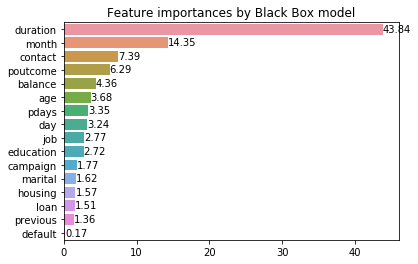

## Поочерёдное зашумление признаков

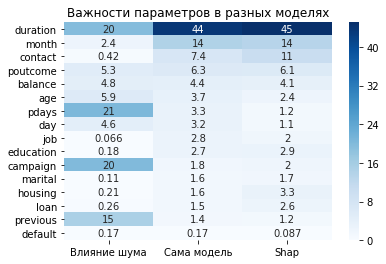

Для оценки влияния признака на предсказания я 100 раз наложил шум на каждый признак и посчитал среднее изменение предсказания.

Получившиеся важности принзаков слегка соотносятся с настоящими важностями атрибутов, хотя доверия не вызывают. С другой стороны, Shap даёт очень похожий результат, хоть и основывается на Black Box методе.

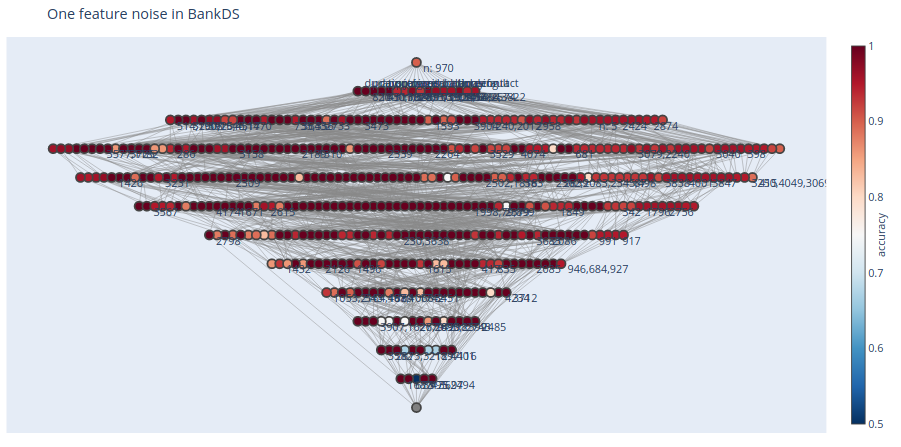

Сформировав контекст на основе зашумления признаков (объекты - строки исходных данных, атрибуты - исходные признаки, в контесте стоит +, если зашумление признака повлияло на предсказание объекта >75% случаев), я построил Решётку понятий.

Решётка получилась очень зашумлённой - видимо надо придумать способ, как фильтровать Понятия.
Цвет отражает качество предсказания Понятия, положение слева-направо - увеличение предсказания модели.

Что можно понять по скоплению красного цвета - в целом модель работает хорошо. "Плохие" Понятия появляются только на очень низких, детальных уровнях.

Посмотрим на конкретное Понятие

Concept 59
* extent (len: 9): 4174, 673, 2798, 3995, 2494, 2086, 4234, 3697, 1897
* intent (len: 2): job, day
* lower neighbours (len: 5): 168,105,172,110,155
* upper neighbours (len: 2): 10,6
* pattern: {'job': {'admin.': 0.25, 'blue-collar': 0.25, 'student': 0.12, 'unemployed': 0.12, 'management': 0.12, 'unknown': 0.12}, 'day': (7.97, 19.05, 24.54)}
* level: 2
* mean y_true: 0.12
* mean y_pred: 0.0
* metrics: {'accuracy': 0.89, 'precision': 0.0, 'recall': 0.0}

Модель недопредсказывает значение в нём (y_pred<y_true), при этом она ориентируется в основном на признаки job и day. При этом значения day оказались второй декадой месяца, а значения job - офисный рабочий.

# Shap

## Бинаризация

Попробуем бинаризовать значения Shap. Будем считать, что атрибут m "хорошо" влияет на объект g, если соответствующее Shap значение больше 0.75 квантили от всех значений Shap. Аналогично, атрибут m "плохо" влияет на объект g, если соответсвующее Shap значение меньше 0.25 квантили от всех значений Shap.

Так как в этом случае в формальном контекстве получается 16*2=32 признака, а это сильно замедляет расчёт концептов, можно брать лишь самые значимые признаки в модели, благо Shap может их достаточно надёжно отранжировать.

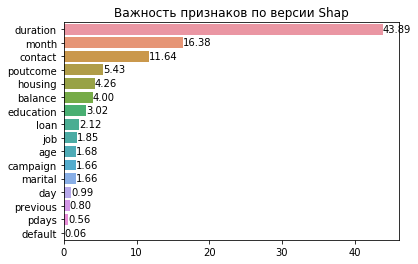

Выберем первые 3 признака

Общая решётка
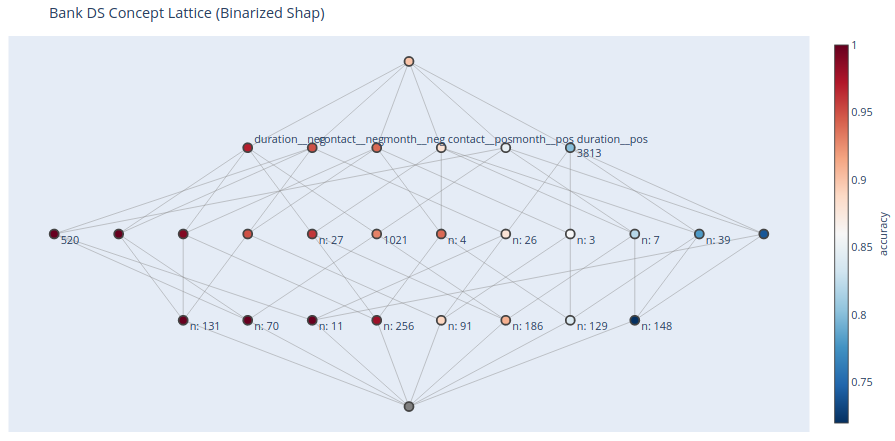

Первый уровень решётки
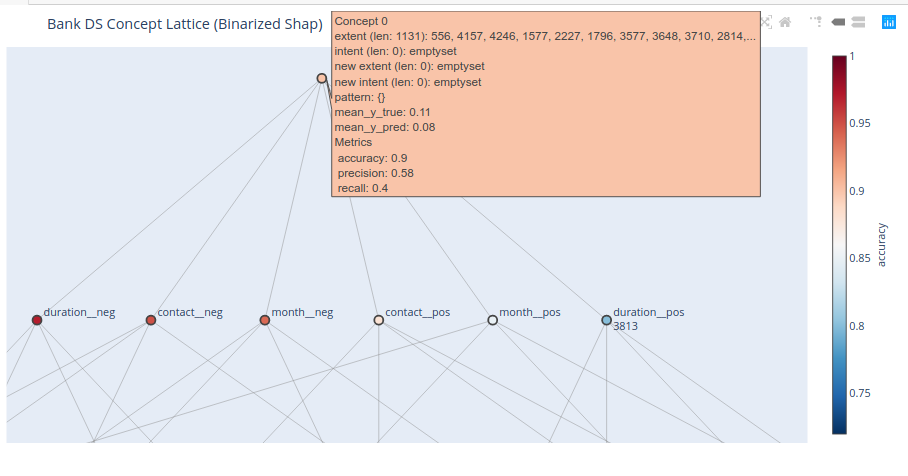

* Положение слева-направо - так же предсказание модели (от 0 до 1)
* Цвет - качество предсказания внутри Понятия

Из увеличенного графика видно, что когда duration влияет негативно - качество модели хорошее, а когда позитивно - плохое. И в целом модель гораздо лучше предсказывает отрицательный класс (левая половина решётки).

Рассмотрим одно из плохопредсказанных понятий

Concept 17
* extent (len: 159): 3660, 243, 567, 231,...
* intent (len: 2): month__pos, duration__pos
* lower neighbours (len: 2): 25,21
* upper neighbours (len: 2): 1,3
* pattern: {'duration': (682.44, 796.16, 909.88), 'month': {'aug': 0.5, 'mar': 0.5}}
* level: 2
* mean y_true: 0.33
* mean y_pred: 0.32
* metrics: {'accuracy': 0.74, 'precision': 0.61, 'recall': 0.6}

Интересно, что в среднем предсказания модели правильны (y_true=y_pred), но в деталях по объектам модель ошибается.

В данном Понятии модель даёт положительные предсказания, потому что видит "хорошие" month и duration. Значение duration действительно хорошее: если оператор говорит с клиентом дольше 680 секунд ~ 11  минут, значит он его заинтересовал). Август и март - возможно на самом деле хорошие месяцы для заключения депозита.

Чтобы лучше разобраться в проблеме, построим решётку только на объектах, входящих в Concept 17

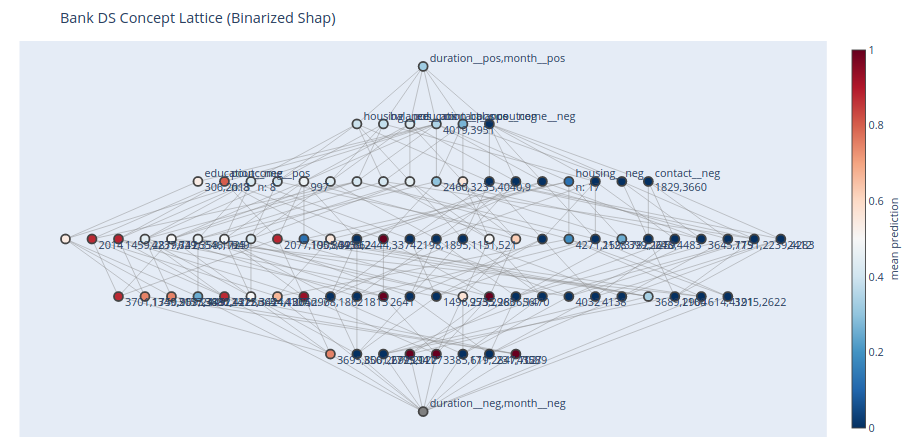

Тут действительно очень много синих (некачественных) Понятий.

Для разнобразия посмотрим на хорошо предсказываемый концепт.

Concept 14
* extent (len: 11): 3660, 1829, 243, 567, 231, 4127, 4138, 2412, 775, 1160, 1775
* intent (len: 4): contact__neg, month__pos, duration__pos, poutcome__neg
* new extent (len: 2): 1829,3660
* new intent (len: 1): contact__neg
* lower neighbours (len: 4): 27,28,45,39
* upper neighbours (len: 1): 1
* pattern: {'contact': {'cellular': 0.44, 'unknown': 0.33, 'telephone': 0.22}, 'poutcome': {'success': 0.33, 'unknown': 0.33, 'failure': 0.22, 'other': 0.11}, 'month': {'aug': 0.11, 'apr': 0.11, 'dec': 0.11, 'oct': 0.11, 'may': 0.11, 'jul': 0.11, 'mar': 0.11, 'jan': 0.11, 'feb': 0.11}}
* level: 2
* mean y_true: 0.0
* mean y_pred: 0.0
* metrics: {'accuracy': 1.0, 'precision': 0.0, 'recall': 0.0}

Модель видит, что звонок в этом Понятии был продолжительным и в нужный месяц, но через плохой contact - сотовый телефон и предыдущие сделки с данными клиентами далеко не всегда заканчивались успешно.

В случае с FCA мы можем посмотреть на группу похожих клиентов (строк) и увидеть определённые зависимости в предсказании, в то время как чистый Shap позволяет смотреть либо только на все данные, либо только на конкретную строку.

## Pattern Structures

Было бы интересно смотреть не просто на "хорошие" и "плохие" значения признаков, а на то, как именно они влияют? Насколько сильно численно?

Так как все значения Shap имеют одну размерность и лежат в $\mathbb{R}$, можно построить одно универсальное правило узорчатых структур.

В моём случае прайм объектов - набор атрибутов, значения которых внутри заданных объектов отличаются не больше, чем на $\eps$.
Т.е. прайм объектов - набор атрибутов, в которых эти объекты ведут себя похоже.

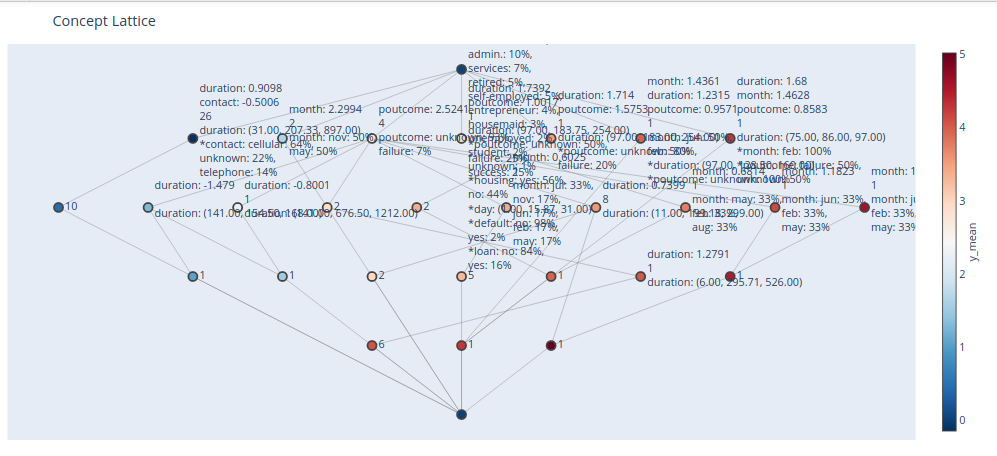

Это самый последний мой эксперимент, поэтому с визуализацию надо ещё доработать и привести к общему виду.

Посмотрим на самое общее Понятие

Concept 0
* len ext: 1131
* intent: 
    - job: 0.01
	- education: 0.01
	- default: 0.00
	- housing: -0.00
	- loan: 0.00
	- day: 0.00
* education:
    - secondary: 50%,
	- tertiary: 31%,
	- primary: 15%,
	- unknown: 4%
* job:
    - management: 22%,
	- blue-collar: 20%,
	- technician: 18%,
	- admin.: 10%,
	- services: 7%,
	- retired: 5%,
	- self-employed: 5%,
	- entrepreneur: 4%,
	- housemaid: 3%,
	- unemployed: 2%,
	- student: 2%,
	- unknown: 1%
* housing: yes: 56%, no: 44%
* day: (1.00, 15.87, 31.00)
* default: no: 98%,	yes: 2%
* loan: no: 84%, yes: 16%

Признаки job, education, default, housing, loan, day почти никак не влияют на предсказания всех объектов

Concept 1
* len ext: 36
* intent:
    - duration: 0.91
	- month: -0.40
	- contact: -0.50
	- poutcome: -0.16
* duration: (31.00, 207.33, 897.00)
* contact:
    - cellular: 64%,
	- unknown: 22%,
	- telephone: 14%
    
В данном Понятии очень большую роль оказывает длительность звонка duration, но предсказние тянут вниз month, contact и poutcome. Зная среднее предсказание модели _expected value_, можно определить вероятность сделки для данного Понятия по версии модели: $$prob = sigmoid(0.91-0.4-0.5-0.16+expected value)$$